# Setup 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import json
import pandas as pd

In [3]:
ROOT_DIR = '../../'
import sys
sys.path.insert(0, ROOT_DIR)

import eval_utils

## Define models to eval 

In [4]:
EVAL_DATASET = 'rf-typicality-unishape'
MODEL_TYPE = 'rsa_ensemble'

In [5]:
eval_results = eval_utils.load_eval_results(EVAL_DATASET, MODEL_TYPE, listener_types=['val'])

# Vocab Distribution 

In [6]:
listener_type = 'val' # pick 'val' since there's only one val listener regardless of speaker type; when there are multiple listeners there are nested dicts in `eval_results`
vocab_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents']) for curr_speaker_results in eval_results]

In [7]:
dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in vocab_dist]

<AxesSubplot:ylabel='Proportion'>

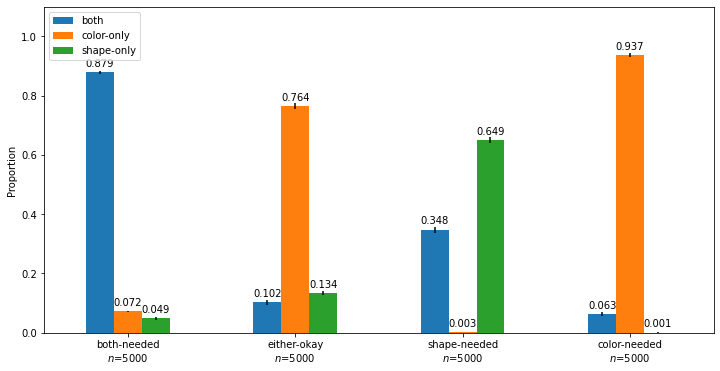

In [8]:
eval_utils.visualize_utterance_distribution(dist_per_speaker)

### When target is red circle

<AxesSubplot:ylabel='Proportion'>

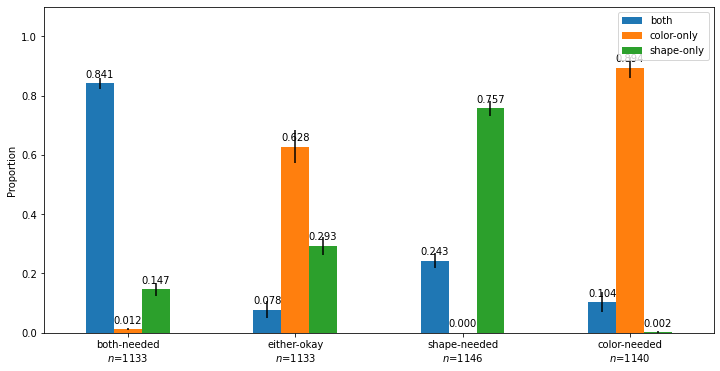

In [9]:
red_circle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] == 'red' and x[1] == 'circle') for curr_speaker_results in eval_results]
red_circle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in red_circle_dist]
eval_utils.visualize_utterance_distribution(red_circle_dist_per_speaker)

### Target is non-red circle 

<AxesSubplot:ylabel='Proportion'>

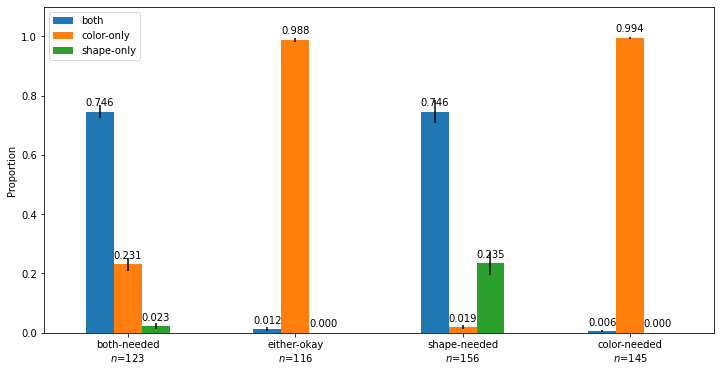

In [10]:
nonred_circle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] != 'red' and x[1] == 'circle') for curr_speaker_results in eval_results]
nonred_circle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in nonred_circle_dist]
eval_utils.visualize_utterance_distribution(nonred_circle_dist_per_speaker)

### Target is red non-circle 

<AxesSubplot:ylabel='Proportion'>

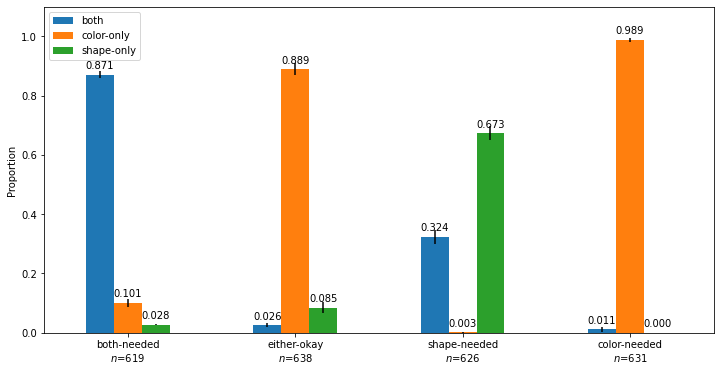

In [11]:
red_noncircle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] == 'red' and x[1] != 'circle') for curr_speaker_results in eval_results]
red_noncircle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in red_noncircle_dist]
eval_utils.visualize_utterance_distribution(red_noncircle_dist_per_speaker)

### Target is neither red nor circle

<AxesSubplot:ylabel='Proportion'>

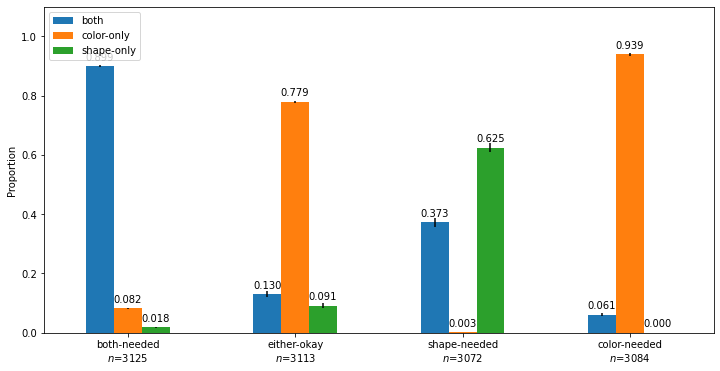

In [12]:
nonred_noncircle_dist = [eval_utils.analyze_vocab_dist(curr_speaker_results[listener_type], curr_speaker_results['all_referents'], lambda x: x[0] != 'red' and x[1] != 'circle') for curr_speaker_results in eval_results]
nonred_noncircle_dist_per_speaker = [vocab_dist_per_speaker['utterance_type'] for vocab_dist_per_speaker in nonred_noncircle_dist]
eval_utils.visualize_utterance_distribution(nonred_noncircle_dist_per_speaker)

# Accuracy

## Val listener

In [13]:
val_accuracy_per_speaker = [eval_utils.analyze_accuracy(curr_speaker_results['val'], curr_speaker_results['all_referents']) for curr_speaker_results in eval_results]

../../eval_utils.py:319: RuntimeWarning: invalid value encountered in true_divide
  incorrect_mean_maxprob_by_config /= num_incorrect_by_config


In [14]:
[val_accuracy['overall_accuracy'] for val_accuracy in val_accuracy_per_speaker]

[0.94025, 0.93915, 0.94135, 0.93925, 0.9399]

In [15]:
val_accuracy_per_speaker[0]['accuracy_by_context'] # only looking at 1 speaker

{'both-needed': 0.9026,
 'either-okay': 0.998,
 'shape-needed': 0.8614,
 'color-needed': 0.999}

# QA 

In [16]:
from collections import Counter

In [17]:
speaker_idx = 0 # only looking at 1 speaker

shape_qa = eval_utils.qualitative_analysis('shape-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)
color_qa = eval_utils.qualitative_analysis('color-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)
either_qa = eval_utils.qualitative_analysis('either-okay', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)

In [18]:
shape_qa

[{'pred': 0,
  'referents': ['gray ellipse', 'gray square', 'gray rectangle'],
  'utterance': 'gray ellipse',
  'sem': array([0.277, 0.   , 0.   ], dtype=float32),
  'probs': array([0.397, 0.301, 0.301], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'red ellipse', 'red rectangle'],
  'utterance': 'circle',
  'sem': array([0.999, 0.   , 0.   ], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'red ellipse', 'red square'],
  'utterance': 'circle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['gray rectangle', 'gray ellipse', 'gray square'],
  'utterance': 'rectangle',
  'sem': array([1.  , 0.  , 0.01], dtype=float32),
  'probs': array([0.575, 0.212, 0.214], dtype=float32)},
 {'pred': 0,
  'referents': ['gray ellipse', 'gray rectangle', 'gray square'],
  'utterance': 'ellipse',
  'sem': array([0.658, 0.   , 0.   ], dtype=flo

## in `shape-needed`, what are examples where color is mentioned?

In [19]:
both_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and any([c in x['utterance'] for c in eval_utils.COLORS])

In [20]:
filtered_shape_qa = list(filter(both_filter_func, shape_qa))
filtered_shape_qa[:8]

[{'pred': 0,
  'referents': ['gray ellipse', 'gray square', 'gray rectangle'],
  'utterance': 'gray ellipse',
  'sem': array([0.277, 0.   , 0.   ], dtype=float32),
  'probs': array([0.397, 0.301, 0.301], dtype=float32)},
 {'pred': 0,
  'referents': ['white square', 'white ellipse', 'white rectangle'],
  'utterance': 'white square',
  'sem': array([1.   , 0.   , 0.747], dtype=float32),
  'probs': array([0.466, 0.172, 0.362], dtype=float32)},
 {'pred': 0,
  'referents': ['white circle', 'white rectangle', 'white ellipse'],
  'utterance': 'white circle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['white square', 'white circle', 'white ellipse'],
  'utterance': 'white square',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 1,
  'referents': ['yellow ellipse', 'yellow circle', 'yellow rectangle'],
  'utterance': 'yellow circle',
  'sem': ar

In [21]:
Counter(map(lambda x:x['referents'][0], filtered_shape_qa)).most_common()

[('red circle', 239),
 ('white rectangle', 108),
 ('blue ellipse', 103),
 ('white ellipse', 97),
 ('gray ellipse', 93),
 ('yellow ellipse', 89),
 ('white square', 80),
 ('red ellipse', 74),
 ('yellow square', 74),
 ('red square', 74),
 ('green square', 71),
 ('green ellipse', 69),
 ('yellow rectangle', 68),
 ('blue rectangle', 65),
 ('green rectangle', 63),
 ('red rectangle', 62),
 ('blue square', 56),
 ('gray square', 49),
 ('gray rectangle', 48),
 ('green circle', 30),
 ('gray circle', 23),
 ('blue circle', 22),
 ('white circle', 18),
 ('yellow circle', 17)]

## in `color-needed`, what are examples where shape is mentioned 

In [22]:
# in color-needed, what are examples where color is mentioned
filtered_color_qa = list(filter(both_filter_func, color_qa))
filtered_color_qa[:8]

[{'pred': 0,
  'referents': ['red circle', 'gray circle', 'blue circle'],
  'utterance': 'red circle',
  'sem': array([0.983, 0.   , 0.   ], dtype=float32),
  'probs': array([0.572, 0.214, 0.214], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'green circle', 'yellow circle'],
  'utterance': 'red circle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['gray rectangle', 'red rectangle', 'white rectangle'],
  'utterance': 'gray square',
  'sem': array([0.999, 0.   , 0.   ], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'gray circle', 'green circle'],
  'utterance': 'red circle',
  'sem': array([0.077, 0.   , 0.   ], dtype=float32),
  'probs': array([0.351, 0.325, 0.325], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'white circle', 'blue circle'],
  'utterance': 'red circle',
  'sem': array([1., 0., 0.], dtype

In [23]:
Counter(map(lambda x:x['referents'][0], filtered_color_qa)).most_common()

[('red circle', 163),
 ('gray rectangle', 47),
 ('white ellipse', 31),
 ('gray square', 26),
 ('gray ellipse', 19),
 ('white rectangle', 15),
 ('white square', 14),
 ('yellow ellipse', 9),
 ('yellow square', 9),
 ('blue square', 6),
 ('yellow rectangle', 5),
 ('blue rectangle', 4),
 ('red rectangle', 3),
 ('green rectangle', 2),
 ('red square', 2),
 ('green square', 1),
 ('white circle', 1)]

## in `either-okay` 

### mentions color, no shape 

In [24]:
color_only_filter_func = lambda x: any([c in x['utterance'] for c in eval_utils.COLORS]) and all([s not in x['utterance'] for s in eval_utils.SHAPES])

color_only_filtered_qa = list(filter(color_only_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], color_only_filtered_qa)).most_common()

[('red circle', 619),
 ('red rectangle', 209),
 ('yellow ellipse', 204),
 ('red ellipse', 201),
 ('green ellipse', 200),
 ('blue rectangle', 199),
 ('blue ellipse', 198),
 ('green square', 187),
 ('green rectangle', 182),
 ('red square', 179),
 ('blue square', 172),
 ('white rectangle', 159),
 ('yellow square', 156),
 ('yellow rectangle', 152),
 ('white ellipse', 148),
 ('gray ellipse', 148),
 ('white square', 124),
 ('gray square', 106),
 ('gray rectangle', 100),
 ('white circle', 28),
 ('blue circle', 26),
 ('gray circle', 24),
 ('green circle', 20),
 ('yellow circle', 17)]

In [25]:
color_only_filtered_qa[:8]

[{'pred': 0,
  'referents': ['green ellipse', 'gray rectangle', 'yellow rectangle'],
  'utterance': 'green shape',
  'sem': array([1.   , 0.017, 0.   ], dtype=float32),
  'probs': array([0.574, 0.215, 0.211], dtype=float32)},
 {'pred': 0,
  'referents': ['blue square', 'gray ellipse', 'green circle'],
  'utterance': 'blue shape',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['green rectangle', 'red circle', 'gray square'],
  'utterance': 'green shape',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'gray square', 'green ellipse'],
  'utterance': 'red',
  'sem': array([0.998, 0.   , 0.   ], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['blue rectangle', 'gray circle', 'gray ellipse'],
  'utterance': 'blue shape',
  'sem': array([1., 0., 0.], dtype=floa

### mentions shape, but no color 

In [26]:
shape_only_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and all([c not in x['utterance'] for c in eval_utils.COLORS])

shape_only_filtered_qa = list(filter(shape_only_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], shape_only_filtered_qa)).most_common()

[('red circle', 388),
 ('gray square', 60),
 ('gray rectangle', 44),
 ('white square', 35),
 ('white ellipse', 29),
 ('red square', 27),
 ('yellow rectangle', 22),
 ('yellow square', 19),
 ('blue square', 17),
 ('blue rectangle', 16),
 ('white rectangle', 13),
 ('red rectangle', 7),
 ('yellow ellipse', 6),
 ('gray ellipse', 6),
 ('green square', 6),
 ('green rectangle', 5),
 ('red ellipse', 2),
 ('green ellipse', 2),
 ('blue ellipse', 1)]

In [27]:
shape_only_filtered_qa[:8]

[{'pred': 0,
  'referents': ['white rectangle', 'gray circle', 'blue ellipse'],
  'utterance': 'rectangle',
  'sem': array([1.   , 0.   , 0.017], dtype=float32),
  'probs': array([0.574, 0.211, 0.215], dtype=float32)},
 {'pred': 0,
  'referents': ['red square', 'gray circle', 'yellow rectangle'],
  'utterance': 'square',
  'sem': array([1.   , 0.   , 0.885], dtype=float32),
  'probs': array([0.443, 0.163, 0.395], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'gray square', 'gray ellipse'],
  'utterance': 'circle',
  'sem': array([1.   , 0.   , 0.007], dtype=float32),
  'probs': array([0.575, 0.212, 0.213], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'yellow rectangle', 'green rectangle'],
  'utterance': 'circle',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['red circle', 'gray square', 'gray ellipse'],
  'utterance': 'circle',
  'sem': array([1., 0., 0.], dtype=float32),


## mentions both color and shape 

In [28]:
both_present_filter_func = lambda x: any([s in x['utterance'] for s in eval_utils.SHAPES]) and any([c in x['utterance'] for c in eval_utils.COLORS])

both_present_filtered_qa = list(filter(both_present_filter_func, either_qa))

Counter(map(lambda x:x['referents'][0], shape_only_filtered_qa)).most_common()

[('red circle', 388),
 ('gray square', 60),
 ('gray rectangle', 44),
 ('white square', 35),
 ('white ellipse', 29),
 ('red square', 27),
 ('yellow rectangle', 22),
 ('yellow square', 19),
 ('blue square', 17),
 ('blue rectangle', 16),
 ('white rectangle', 13),
 ('red rectangle', 7),
 ('yellow ellipse', 6),
 ('gray ellipse', 6),
 ('green square', 6),
 ('green rectangle', 5),
 ('red ellipse', 2),
 ('green ellipse', 2),
 ('blue ellipse', 1)]

In [29]:
qa = eval_utils.qualitative_analysis('both-needed', eval_results[speaker_idx]['val'], eval_results[speaker_idx]['all_referents'], num_examples=-1)

In [30]:
filter_func = lambda x: 'white' in x['referents'][0] and 'gray' in x['utterance']

In [31]:
list(filter(filter_func, qa))

[{'pred': 0,
  'referents': ['white ellipse', 'red ellipse', 'white circle'],
  'utterance': 'gray ellipse',
  'sem': array([1., 0., 0.], dtype=float32),
  'probs': array([0.576, 0.212, 0.212], dtype=float32)},
 {'pred': 0,
  'referents': ['white ellipse', 'red ellipse', 'white circle'],
  'utterance': 'gray ellipse',
  'sem': array([0.016, 0.   , 0.   ], dtype=float32),
  'probs': array([0.337, 0.332, 0.332], dtype=float32)},
 {'pred': 2,
  'referents': ['white ellipse', 'blue ellipse', 'white circle'],
  'utterance': 'gray ellipse',
  'sem': array([0.   , 0.   , 0.001], dtype=float32),
  'probs': array([0.333, 0.333, 0.334], dtype=float32)},
 {'pred': 2,
  'referents': ['white ellipse', 'red ellipse', 'white circle'],
  'utterance': 'gray ellipse',
  'sem': array([0.001, 0.   , 0.981], dtype=float32),
  'probs': array([0.214, 0.214, 0.571], dtype=float32)},
 {'pred': 0,
  'referents': ['white ellipse', 'green ellipse', 'white circle'],
  'utterance': 'gray ellipse',
  'sem': array([0